## Cisco Cashflow Forecast

### Objective:

1.Apply your financial and analytical knowledge to determine key trends and pattern in the data. What are your observations?

2.How can Stark predict future Cashflow for each line items?

3.If Stark has to make the prediction of "Net Income" for next 2 quarters, shall he use the line items-basedforecast or overall "Net Income" forecast? Why?

4.How can Stark make a forecast for items that don't show a trend?

5.Predict the "Net Income" for next 2 quarters? What business thought processes and/orstatisticaltechniques did you use? Why? How confident are you in your predictions? What would you advise to Stark?


In [1]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import pandas_profiling
import datetime as dt
import warnings
warnings.filterwarnings('ignore') 

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Data Loading

In [2]:
#loading the data

df = pd.read_excel(r"C:\Users\MRAVI\Desktop\Trimester 3\Financial Analytics\Cisco Case study Dataset.xlsx", sheet_name="Data", skiprows=1, index_col=None)

In [3]:
df.head()

,Unnamed: 0,Unnamed: 1,Qtr Ending,Qtr Ending.1,Qtr Ending.2,Qtr Ending.3,Qtr Ending.4,Qtr Ending.5,Qtr Ending.6,Qtr Ending.7,...,Qtr Ending.16,Qtr Ending.17,Qtr Ending.18,Qtr Ending.19,Qtr Ending.20,Qtr Ending.21,Qtr Ending.22,Qtr Ending.23,Qtr Ending.24,Qtr Ending.25
0,NaN,NaN,2009-10-24 00:00:00,2010-01-23 00:00:00,2010-05-01 00:00:00,2010-07-31 00:00:00,2010-10-30 00:00:00,2011-01-29 00:00:00,2011-04-30 00:00:00,2011-07-30 00:00:00,...,2013-10-26 00:00:00,2014-01-25 00:00:00,2014-04-26 00:00:00,2014-07-26 00:00:00,2014-10-25 00:00:00,2015-01-24 00:00:00,2015-04-25 00:00:00,2015-07-25 00:00:00,2015-10-24 00:00:00,2016-01-23 00:00:00
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NET SALES:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Product,7200,7976,8436,8808,8700,8236,8669,8921,...,9397,8423,8820,9532,9435,9078,9326,9911,9844,8983
4,NaN,Service,1821,1839,1932,2028,2050,2171,2197,2274,...,2688,2732,2725,2825,2810,2858,2811,2932,2838,2944


### Data Preprocessing

In [4]:
df.dropna(how="all",inplace=True)
df['Unnamed: 0'] = df['Unnamed: 0'].fillna(method='ffill')
df['Unnamed: 1'] = df['Unnamed: 1'].fillna(df['Unnamed: 0']) 
df = df.T[1:]
df.rename(columns = {'Unnamed: 1':'Qtr'}, inplace=True)
df.columns = df.iloc[0]
df = df.drop(['NET SALES:', 'COST OF SALES:', 'OPERATING EXPENSES:'], axis=1)
df = df.reset_index(level = 0, drop=True)
df = df.drop(df.index[0])
columns = ['Qtr','NETSales_Product','NETSales_Service','Total_NETSales','COSTSales_Product','COSTSales_Service',
           'Total_COSTSales','GROSS_MARGIN','OPEX_R_D','OPEX_Sales_Marketing','OPEX_General_Administrative','OPEX_Intag_Assets','OPEX_Restruct_OtherCharges',
           'Total_OPEX','OPIN','Interest_Income','Interest_Expense','Other_Income','NetInterest_OtherIncome',
           'INCOME_BeforeTax', 'PROVISION_for_Income_Taxes','NET_INCOME']
df.columns = columns
df.head()
df.shape

,Qtr,NETSales_Product,NETSales_Service,Total_NETSales,COSTSales_Product,COSTSales_Service,Total_COSTSales,GROSS_MARGIN,OPEX_R_D,OPEX_Sales_Marketing,...,OPEX_Restruct_OtherCharges,Total_OPEX,OPIN,Interest_Income,Interest_Expense,Other_Income,NetInterest_OtherIncome,INCOME_BeforeTax,PROVISION_for_Income_Taxes,NET_INCOME
1,2009-10-24 00:00:00,7200,1821,9021,2486,647,3133,5888,1224,2010,...,NaN,3764,2124,168,-114,61,115,2239,452,1787
2,2010-01-23 00:00:00,7976,1839,9815,2815,668,3483,6332,1247,2126,...,NaN,3962,2370,155,-158,-12,-15,2355,502,1853
3,2010-05-01 00:00:00,8436,1932,10368,3010,728,3738,6630,1411,2278,...,NaN,4285,2345,158,-182,82,58,2403,211,2192
4,2010-07-31 00:00:00,8808,2028,10836,3309,734,4043,6793,1391,2368,...,NaN,4468,2325,154,-169,108,93,2418,483,1935
5,2010-10-30 00:00:00,8700,2050,10750,3249,746,3995,6755,1431,2402,...,NaN,4404,2351,160,-166,80,74,2425,495,1930


(26, 22)

Linear regression doesn't work on date data. Therefore we need to convert it into numerical value.

In [5]:

#df['Qtr'] = df['Qtr'].map(dt.datetime.toordinal)
df['Qtr'] = df.index.values
df = df.convert_objects(convert_numeric=True)
df.head()
df.tail()
df.columns

,Qtr,NETSales_Product,NETSales_Service,Total_NETSales,COSTSales_Product,COSTSales_Service,Total_COSTSales,GROSS_MARGIN,OPEX_R_D,OPEX_Sales_Marketing,...,OPEX_Restruct_OtherCharges,Total_OPEX,OPIN,Interest_Income,Interest_Expense,Other_Income,NetInterest_OtherIncome,INCOME_BeforeTax,PROVISION_for_Income_Taxes,NET_INCOME
1,1,7200,1821,9021,2486,647,3133,5888,1224,2010,...,NaN,3764,2124,168,-114,61,115,2239,452,1787
2,2,7976,1839,9815,2815,668,3483,6332,1247,2126,...,NaN,3962,2370,155,-158,-12,-15,2355,502,1853
3,3,8436,1932,10368,3010,728,3738,6630,1411,2278,...,NaN,4285,2345,158,-182,82,58,2403,211,2192
4,4,8808,2028,10836,3309,734,4043,6793,1391,2368,...,NaN,4468,2325,154,-169,108,93,2418,483,1935
5,5,8700,2050,10750,3249,746,3995,6755,1431,2402,...,NaN,4404,2351,160,-166,80,74,2425,495,1930


,Qtr,NETSales_Product,NETSales_Service,Total_NETSales,COSTSales_Product,COSTSales_Service,Total_COSTSales,GROSS_MARGIN,OPEX_R_D,OPEX_Sales_Marketing,...,OPEX_Restruct_OtherCharges,Total_OPEX,OPIN,Interest_Income,Interest_Expense,Other_Income,NetInterest_OtherIncome,INCOME_BeforeTax,PROVISION_for_Income_Taxes,NET_INCOME
22,22,9078,2858,11936,3806,1040,4846,7090,1529,2308,...,69.0,4468,2622,189,-139,201,251,2873,476,2397
23,23,9326,2811,12137,3584,1028,4612,7525,1547,2449,...,24.0,4600,2925,190,-139,59,110,3035,598,2437
24,24,9911,2932,12843,4068,1042,5110,7733,1548,2549,...,73.0,4852,2881,211,-149,-10,52,2933,614,2319
25,25,9844,2838,12682,3853,997,4850,7832,1560,2443,...,142.0,4753,3079,225,-159,-8,58,3137,707,2430
26,26,8983,2944,11927,3480,1015,4495,7432,1509,2286,...,96.0,4138,3294,237,-162,-63,12,3306,159,3147


Index(['Qtr', 'NETSales_Product', 'NETSales_Service', 'Total_NETSales',
       'COSTSales_Product', 'COSTSales_Service', 'Total_COSTSales',
       'GROSS_MARGIN', 'OPEX_R_D', 'OPEX_Sales_Marketing',
       'OPEX_General_Administrative', 'OPEX_Intag_Assets',
       'OPEX_Restruct_OtherCharges', 'Total_OPEX', 'OPIN', 'Interest_Income',
       'Interest_Expense', 'Other_Income', 'NetInterest_OtherIncome',
       'INCOME_BeforeTax', 'PROVISION_for_Income_Taxes', 'NET_INCOME'],
      dtype='object')

In [6]:
df.describe()

,Qtr,NETSales_Product,NETSales_Service,Total_NETSales,COSTSales_Product,COSTSales_Service,Total_COSTSales,GROSS_MARGIN,OPEX_R_D,OPEX_Sales_Marketing,...,OPEX_Restruct_OtherCharges,Total_OPEX,OPIN,Interest_Income,Interest_Expense,Other_Income,NetInterest_OtherIncome,INCOME_BeforeTax,PROVISION_for_Income_Taxes,NET_INCOME
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,...,19.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,13.500000,9001.923077,2491.846154,11493.769231,3602.461538,870.461538,4472.923077,7020.846154,1465.230769,2378.153846,...,123.578947,4536.730769,2484.115385,173.153846,-149.269231,29.884615,53.769231,2537.884615,434.346154,2103.538462
std,7.648529,608.813595,352.015192,908.767443,403.240695,118.231038,497.377677,507.631338,110.192307,116.647741,...,176.836810,327.498343,436.571948,21.454496,12.941585,54.838182,56.807258,438.761742,213.060356,439.284803
min,1.000000,7200.000000,1821.000000,9021.000000,2486.000000,647.000000,3133.000000,5888.000000,1224.000000,2010.000000,...,3.000000,3764.000000,1456.000000,154.000000,-182.000000,-63.000000,-20.000000,1467.000000,-363.000000,1232.000000
25%,7.250000,8727.000000,2216.250000,10938.250000,3447.750000,765.500000,4238.750000,6764.500000,1411.250000,2346.500000,...,28.500000,4407.750000,2329.250000,160.250000,-156.750000,-9.500000,15.000000,2356.250000,410.000000,1834.250000
50%,13.500000,9092.000000,2618.000000,11639.000000,3622.500000,885.000000,4572.000000,7087.500000,1465.000000,2398.500000,...,73.000000,4543.500000,2498.500000,165.500000,-148.000000,19.000000,49.000000,2585.500000,479.500000,2128.500000
75%,19.750000,9425.500000,2790.500000,12127.250000,3841.250000,968.000000,4823.250000,7390.500000,1545.750000,2445.500000,...,119.000000,4705.500000,2779.250000,177.000000,-142.250000,58.250000,87.250000,2848.250000,542.750000,2306.750000
max,26.000000,9911.000000,2944.000000,12843.000000,4323.000000,1042.000000,5204.000000,7832.000000,1724.000000,2549.000000,...,768.000000,5405.000000,3294.000000,237.000000,-114.000000,201.000000,251.000000,3306.000000,707.000000,3147.000000


# Missing Value Treatment

We have few missing value in OPEX_Restruct_OtherCharges. Let's replace the missing values with Median

In [7]:
df.OPEX_Restruct_OtherCharges = df.OPEX_Restruct_OtherCharges.fillna(df.OPEX_Restruct_OtherCharges.median())

In [8]:
df.OPEX_Restruct_OtherCharges.median()

73.0

In [9]:
EDA_report = pandas_profiling.ProfileReport(df)
EDA_report

Number of variables,23
Number of observations,26
Total Missing (%),0.0%
Total size in memory,4.8 KiB
Average record size in memory,187.1 B
Numeric,16
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,7


### Splitting the data into 3 sub data sets

#### Dataset 1 - Individual Items (Without Totals)

In [10]:
df_items = df.loc[:,('Qtr','NETSales_Product', 'NETSales_Service', 'COSTSales_Product', 'COSTSales_Service', 
                     'OPEX_R_D', 'OPEX_Sales_Marketing', 'OPEX_General_Administrative', 'OPEX_Intag_Assets', 'OPEX_Restruct_OtherCharges',
                    'Interest_Income','Interest_Expense','Other_Income','PROVISION_for_Income_Taxes','NET_INCOME')]
df_items.head()
df_items.shape

,Qtr,NETSales_Product,NETSales_Service,COSTSales_Product,COSTSales_Service,OPEX_R_D,OPEX_Sales_Marketing,OPEX_General_Administrative,OPEX_Intag_Assets,OPEX_Restruct_OtherCharges,Interest_Income,Interest_Expense,Other_Income,PROVISION_for_Income_Taxes,NET_INCOME
1,1,7200,1821,2486,647,1224,2010,425,105,73.0,168,-114,61,452,1787
2,2,7976,1839,2815,668,1247,2126,451,138,73.0,155,-158,-12,502,1853
3,3,8436,1932,3010,728,1411,2278,479,117,73.0,158,-182,82,211,2192
4,4,8808,2028,3309,734,1391,2368,578,131,73.0,154,-169,108,483,1935
5,5,8700,2050,3249,746,1431,2402,458,113,73.0,160,-166,80,495,1930


(26, 15)

#### Dataset 2 - Item Sub Totals

In [11]:
df_item_totals = df.loc[:,('Qtr','Total_NETSales', 'Total_COSTSales', 'GROSS_MARGIN','Total_OPEX', 'OPIN', 'NetInterest_OtherIncome','INCOME_BeforeTax','PROVISION_for_Income_Taxes', 'NET_INCOME')]
df_item_totals.head()
df_item_totals.shape

,Qtr,Total_NETSales,Total_COSTSales,GROSS_MARGIN,Total_OPEX,OPIN,NetInterest_OtherIncome,INCOME_BeforeTax,PROVISION_for_Income_Taxes,NET_INCOME
1,1,9021,3133,5888,3764,2124,115,2239,452,1787
2,2,9815,3483,6332,3962,2370,-15,2355,502,1853
3,3,10368,3738,6630,4285,2345,58,2403,211,2192
4,4,10836,4043,6793,4468,2325,93,2418,483,1935
5,5,10750,3995,6755,4404,2351,74,2425,495,1930


(26, 10)

#### Dataset 3 - Net Income

In [12]:
df_NetIncome = pd.DataFrame(df,columns=['Qtr','NET_INCOME'])
df_NetIncome.head()
df_NetIncome.shape

,Qtr,NET_INCOME
1,1,1787
2,2,1853
3,3,2192
4,4,1935
5,5,1930


(26, 2)

### Visualizing Net Income Trend

<Figure size 1000x600 with 0 Axes>

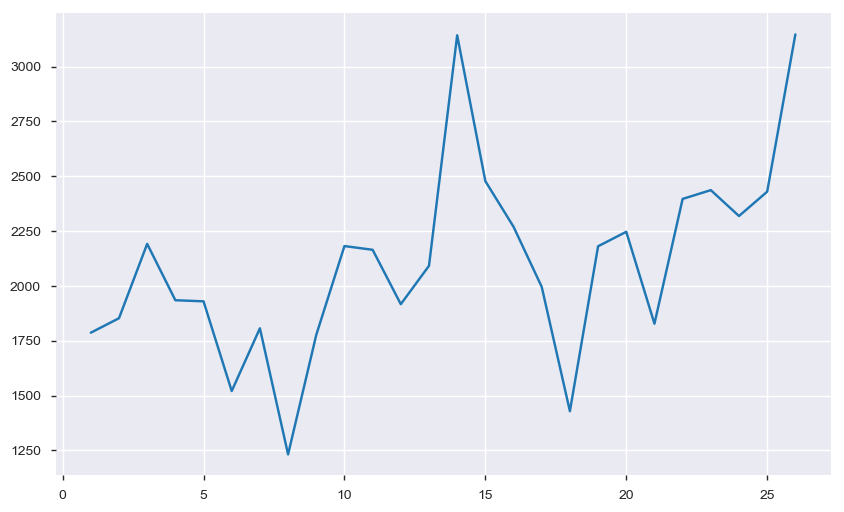

In [13]:
#plot
plt.figure(figsize=(10,6))
plt.plot(df_NetIncome['NET_INCOME'], label='NET_INCOME')

## Approach 1

### Simple Linear Regression on individual Cash flow items

In [14]:
# Importing Necessary Libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [15]:
# Function to impute Outliers with Mean

def outliers(Y_OL):
    final_list=[]
    elements = np.array(Y_OL)
    mean = np.mean(elements, axis=0)
    sd = np.std(elements, axis=0)

    for a in Y_OL:
        if ((a > mean - 2 * sd) and (a < mean + 2 * sd)):
            final_list.append(a)
        else:
            final_list.append(mean)

    return final_list


# Function to find the Coefficients

def coeff(X,Y):

    # Total number of values
    m = len(X)

    # Using the formula to calculate b1 and b2
    numer = 0
    denom = 0
    for i in range(m):
        numer += (X[i] - mean_x) * (Y[i] - mean_y)
        denom += (X[i] - mean_x) ** 2
    b1 = numer / denom
    b0 = mean_y - (b1 * mean_x)

    return[b0, b1]

# Calculating Root Mean Squares Error
def rms(X,Y,m):
    rmse = 0
    for i in range(m):
        y_pred = b0 + b1 * X[i]
        rmse += (Y[i] - y_pred) ** 2
    rmse = np.sqrt(rmse/m)
    #print(rmse)
    return rmse    

# Calculating the Root Square
def r_square(X,Y):
    ss_t = 0
    ss_r = 0
    for i in range(m):
        y_pred = b0 + b1 * X[i]
        ss_t += (Y[i] - mean_y) ** 2
        ss_r += (Y[i] - y_pred) ** 2
        
    r2 = 1 - (ss_r/ss_t)
    
    return r2

def ypred(X,Y):
    ypredicted = []
    for i in range(m):
        y_pred = b0 + b1 * X[i]
        ypredicted.append(y_pred)
    return ypredicted

In [16]:
df2 = pd.DataFrame()
df_ypredicted = pd.DataFrame()
lst_rmse = []
lst_r2=[]
lst_coeff = []
lst_ypred27 = []
lst_ypred28 = []
Y=[]

for column in df_items:
    X = df_items['Qtr'].values
    Y_OL = df_items[column].values
    m = len(X)
    df2['Items'] = df_items.columns
    Y = outliers(Y_OL)
    # Mean X and Y
    mean_x = np.mean(X)
    mean_y = np.mean(Y)
    b0, b1 = coeff(X,Y)
    lst_coeff.append([b0, b1])
    lst_rmse.append(rms(X,Y,m))
    lst_r2.append(r_square(X,Y))
    lst_ypred27.append(coeff(X,Y)[0] + coeff(X,Y)[1] * 27) 
    lst_ypred28.append(coeff(X,Y)[0] + coeff(X,Y)[1] * 28) 
df2['Coefficients'] = lst_coeff
df2['RMSE'] = lst_rmse
df2['R_Square'] = lst_r2
df2['Qtr_27_Predicted'] = lst_ypred27
df2['Qtr_28_Predicted'] = lst_ypred28
df_ypredicted['Qtr'] = df['Qtr']
df_ypredicted['Predicted'] = ypred(X,Y)
df2.index = df2['Items']
df2 = df2.drop('Items', axis=1)
df2 = df2.drop(df2.index[0])
df2

,Coefficients,RMSE,R_Square,Qtr_27_Predicted,Qtr_28_Predicted
Items,,,,,
NETSales_Product,"[8519.523550295859, 40.86698224852071]",364.375390,0.414373,9622.932071,9663.799053
NETSales_Service,"[1889.04, 44.652307692307694]",83.641424,0.941284,3094.652308,3139.304615
COSTSales_Product,"[3259.0740828402368, 28.616909927679153]",245.964881,0.432275,4031.730651,4060.347561
COSTSales_Service,"[666.8215384615385, 15.084444444444447]",25.333569,0.952251,1074.101538,1089.185983
OPEX_R_D,"[1390.9041420118344, 6.077449046679814]",53.784833,0.417996,1554.995266,1561.072715
OPEX_Sales_Marketing,"[2390.2674556213015, 0.8699539776462848]",69.377015,0.008767,2413.756213,2414.626167
OPEX_General_Administrative,"[488.60710059171606, 1.5217619986850752]",43.328266,0.064884,529.694675,531.216437
OPEX_Intag_Assets,"[120.03136094674555, -1.8867192636423404]",19.105678,0.354232,69.089941,67.203222
OPEX_Restruct_OtherCharges,"[60.950414201183435, 1.7557001972386586]",68.441948,0.035694,108.354320,110.110020


### Calculations for Net Income for the Qtr 27

In [17]:
NET_SALES = df2.Qtr_27_Predicted[0] + df2.Qtr_27_Predicted[1]

COST_OF_SALES = df2.Qtr_27_Predicted[2] + df2.Qtr_27_Predicted[3]

OPEX = df2.Qtr_27_Predicted[4] + df2.Qtr_27_Predicted[5] + df2.Qtr_27_Predicted[6] + df2.Qtr_27_Predicted[7] + df2.Qtr_27_Predicted[8] 

NET_INEREST_INCOME = df2.Qtr_27_Predicted[9] + df2.Qtr_27_Predicted[10] + df2.Qtr_27_Predicted[11]

PROVISION_for_Income_Taxes = df2.Qtr_27_Predicted[12]

NET_INCOME1 = NET_SALES - COST_OF_SALES - OPEX + NET_INEREST_INCOME - PROVISION_for_Income_Taxes

print("Net Income for Qtr 27 is :", NET_INCOME1)

Net Income for Qtr 27 is : 2440.8542011834334


### Calculations for Net Income for the Qtr 28

In [18]:
NET_SALES = df2.Qtr_28_Predicted[0] + df2.Qtr_28_Predicted[1]

COST_OF_SALES = df2.Qtr_28_Predicted[2] + df2.Qtr_28_Predicted[3]

OPEX = df2.Qtr_28_Predicted[4] + df2.Qtr_28_Predicted[5] + df2.Qtr_28_Predicted[6] + df2.Qtr_28_Predicted[7] + df2.Qtr_28_Predicted[8] 

NET_INEREST_INCOME = df2.Qtr_28_Predicted[9] + df2.Qtr_28_Predicted[10] + df2.Qtr_28_Predicted[11]

PROVISION_for_Income_Taxes = df2.Qtr_28_Predicted[12]

NET_INCOME2 = NET_SALES - COST_OF_SALES - OPEX + NET_INEREST_INCOME - PROVISION_for_Income_Taxes

print("Net Income for Qtr 28 is :", NET_INCOME2)

Net Income for Qtr 28 is : 2468.9536357659463


### Plotting Qtr vs Net Income & Predicted Net Income

Text(0.5,0,'Qtr')

Text(0,0.5,'Net Income')

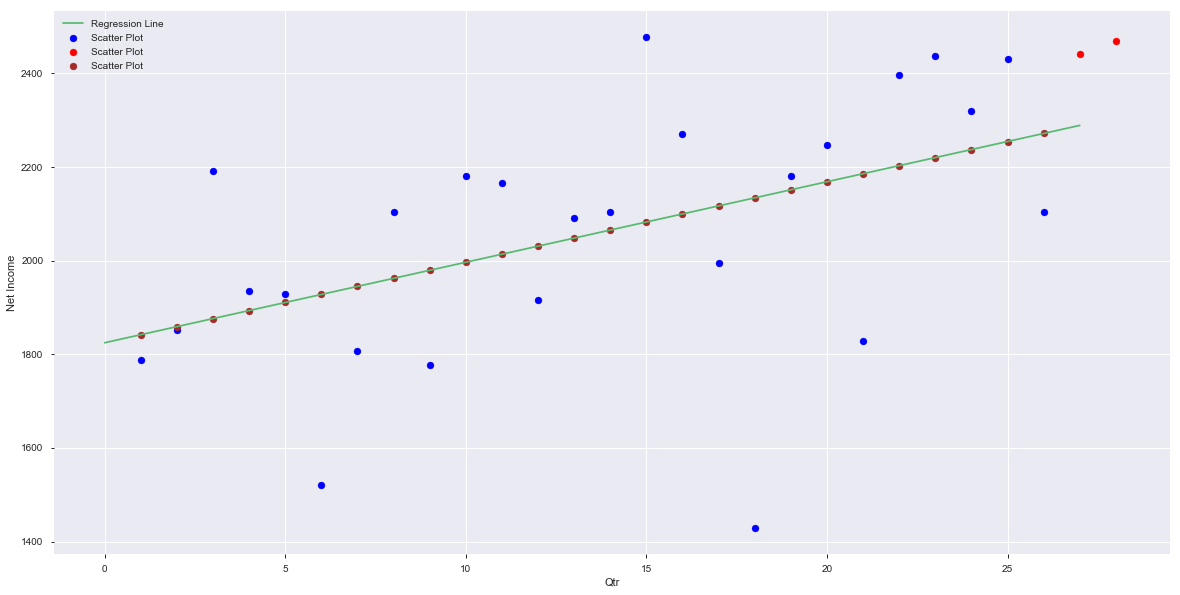

In [22]:
# Plotting Values and Regression Line
Qtr_pred = [27,28]
predicted = [NET_INCOME1, NET_INCOME2]
X = df['Qtr']
max_x = np.max(X) + 1
min_x = np.min(X) - 1
# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x
# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='blue', label='Scatter Plot')
plt.scatter(Qtr_pred, predicted, c='red', label='Scatter Plot')
plt.scatter(df_ypredicted['Qtr'], df_ypredicted['Predicted'], c='brown', label='Scatter Plot')

plt.xlabel('Qtr')
plt.ylabel('Net Income')
plt.legend()
plt.show()

## Approach 2
### Simple Linear Regression on individual Sub Totals and Calculating the Net Income

In [23]:
df2 = pd.DataFrame()
lst_rmse = []
lst_r2=[]
lst_coeff = []
lst_ypred27 = []
lst_ypred28 = []
Y=[]
for column in df_item_totals:
    X = df_item_totals['Qtr'].values
    Y_OL = df_item_totals[column].values
    m = len(X)
    df2['Items'] = df_item_totals.columns
    Y = outliers(Y_OL)
    # Mean X and Y
    mean_x = np.mean(X)
    mean_y = np.mean(Y)
    b0, b1 = coeff(X,Y)
    lst_coeff.append([b0, b1])
    lst_rmse.append(rms(X,Y,m))
    lst_r2.append(r_square(X,Y))
    lst_ypred27.append(coeff(X,Y)[0] + coeff(X,Y)[1] * 27) 
    lst_ypred28.append(coeff(X,Y)[0] + coeff(X,Y)[1] * 28) 
df2['Coefficients'] = lst_coeff
df2['RMSE'] = lst_rmse
df2['R_Square'] = lst_r2
df2['Qtr_27_Predicted'] = lst_ypred27
df2['Qtr_28_Predicted'] = lst_ypred28

df2.index = df2['Items']
df2 = df2.drop('Items', axis=1)
df2 = df2.drop(df2.index[0])
df2

,Coefficients,RMSE,R_Square,Qtr_27_Predicted,Qtr_28_Predicted
Items,,,,,
Total_NETSales,"[10511.770650887574, 79.78556213017751]",437.949932,0.651192,12665.980828,12745.766391
Total_COSTSales,"[4103.432426035503, 34.007416173570014]",240.920383,0.528477,5021.632663,5055.640079
GROSS_MARGIN,"[6548.204497041421, 41.28596975673898]",226.583438,0.651270,7662.925680,7704.211650
Total_OPEX,"[4379.614556213018, 11.366048652202496]",209.494600,0.142055,4686.497870,4697.863918
OPIN,"[2130.7426035502954, 29.104865220249835]",305.609540,0.337825,2916.573964,2945.678830
NetInterest_OtherIncome,"[38.80307692307692, 0.5466929651545037]",39.146364,0.010851,53.563787,54.110480
INCOME_BeforeTax,"[2165.472781065089, 30.6370151216305]",294.118879,0.379012,2992.672189,3023.309204
PROVISION_for_Income_Taxes,"[394.9224852071006, 5.191913214990137]",129.381897,0.083056,535.104142,540.296055
NET_INCOME,"[1824.8340828402368, 17.19353057199211]",232.596202,0.235100,2289.059408,2306.252939


### Calculations for Net Income for the Qtr 27

In [24]:
NET_INCOME1 = df2.Qtr_27_Predicted[0] - df2.Qtr_27_Predicted[1] - df2.Qtr_27_Predicted[3] + df2.Qtr_27_Predicted[5] - df2.Qtr_27_Predicted[7]


print("Net Income for Qtr 27 is :", NET_INCOME1)

Net Income for Qtr 27 is : 2476.3099408284024


### Calculations for Net Income for the Qtr 28

In [25]:
NET_INCOME2 = df2.Qtr_28_Predicted[0] - df2.Qtr_28_Predicted[1] - df2.Qtr_28_Predicted[3] + df2.Qtr_28_Predicted[5] - df2.Qtr_28_Predicted[7]


print("Net Income for Qtr 28 is :", NET_INCOME2)

Net Income for Qtr 28 is : 2506.076817882971


Text(0.5,0,'Qtr')

Text(0,0.5,'Net Income')

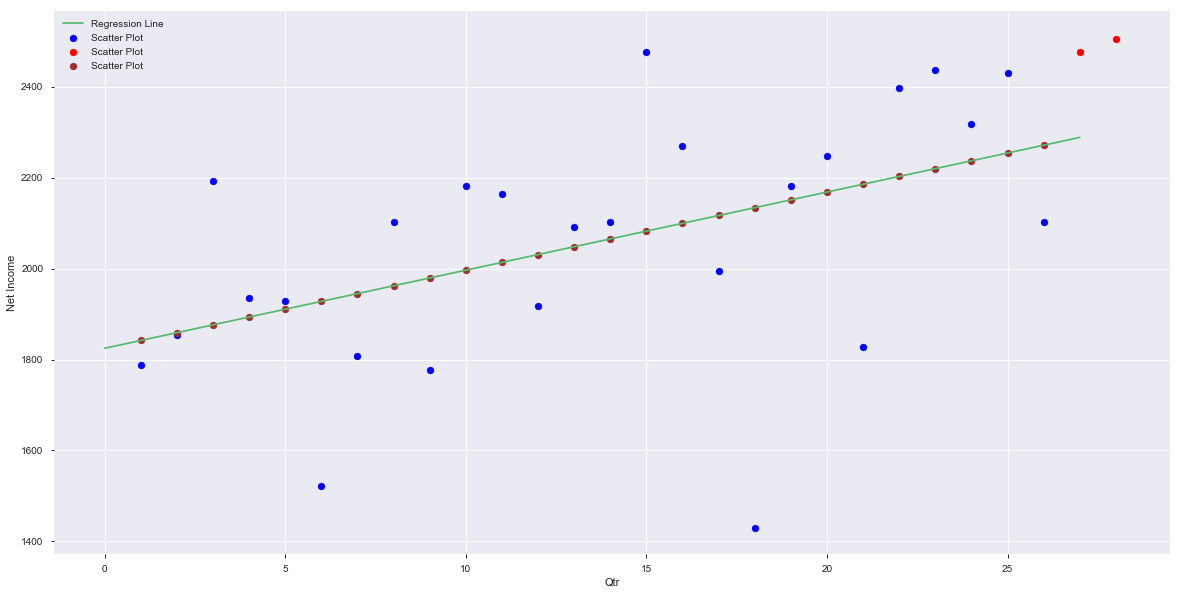

In [26]:
# Plotting Values and Regression Line
Qtr_pred = [27,28]
predicted = [NET_INCOME1, NET_INCOME2]
X = df['Qtr']

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x
# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='blue', label='Scatter Plot')
plt.scatter(Qtr_pred, predicted, c='red', label='Scatter Plot')
plt.scatter(df_ypredicted['Qtr'], df_ypredicted['Predicted'], c='brown', label='Scatter Plot')

plt.xlabel('Qtr')
plt.ylabel('Net Income')
plt.legend()
plt.show()

## Approach 3

### Simple Linear Regression with Gross Margin as Independant variable and Net Income being Dependant variable

#### Gross Margin is one of the variable which is linearly correlated with the Net Income. Hence we are trying to predict the Net Income using Gross Margin.

#### We chose Gross Margin as the X variable instead of "OPIN" and "INCOME_BeforeTax" because Gross Margin only requires few fields/inputs compare to others

In [27]:
df3 = pd.DataFrame()
lst_rmse = []
lst_r2=[]
lst_coeff = []
lst_ypred27 = []
lst_ypred28 = []
lst_y_pred = []
Y=[]
X = df['GROSS_MARGIN'].values
Y_OL = df['NET_INCOME'].values
Y = outliers(Y_OL)
m = len(X)

# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)
b0, b1 = coeff(X,Y)
lst_coeff.append([b0, b1])
lst_rmse.append(rms(X,Y,m))
lst_r2.append(r_square(X,Y))
lst_ypred27.append(coeff(X,Y)[0] + coeff(X,Y)[1] * 7664.426561) 
lst_ypred28.append(coeff(X,Y)[0] + coeff(X,Y)[1] * 7712.078297) 
df3['Coefficients'] = lst_coeff
df3['RMSE'] = lst_rmse
df3['R_Square'] = lst_r2
df3['Qtr_27_Predicted'] = lst_ypred27
df3['Qtr_28_Predicted'] = lst_ypred28

for i in range(m):
    y_pred = b0 + b1 * X[i]
    lst_y_pred.append(y_pred)

df_Gross_Margin = pd.DataFrame()
df_Gross_Margin['Qtr']= df['Qtr']
df_Gross_Margin['GROSS_MARGIN'] = df['GROSS_MARGIN'] 
df_Gross_Margin['NET_INCOME'] = Y 
df_Gross_Margin['NET_INCOME_Predicted'] = lst_y_pred

df_Gross_Margin

df3

,Qtr,GROSS_MARGIN,NET_INCOME,NET_INCOME_Predicted
1,1,5888,1787.000000,1588.410348
2,2,6332,1853.000000,1772.045310
3,3,6630,2192.000000,1895.295803
4,4,6793,1935.000000,1962.711341
5,5,6755,1930.000000,1946.994835
6,6,6261,1521.000000,1742.680260
7,7,6659,1807.000000,1907.289978
8,8,6861,2103.538462,1990.835614
9,9,6890,1777.000000,2002.829790
10,10,7065,2182.000000,2075.208434


,Coefficients,RMSE,R_Square,Qtr_27_Predicted,Qtr_28_Predicted
0,"[-846.8208593239965, 0.4135922567246951]",168.359306,0.59925,2323.126619,2342.835008


### Plotting Actual 'Net Income' vs 'Predicted Net Income'

Text(0.5,1,'Actual Net Income vs Predicted Net Income')

Text(0.5,0,'Actual Net Income')

Text(0,0.5,'Predicted Net Income')

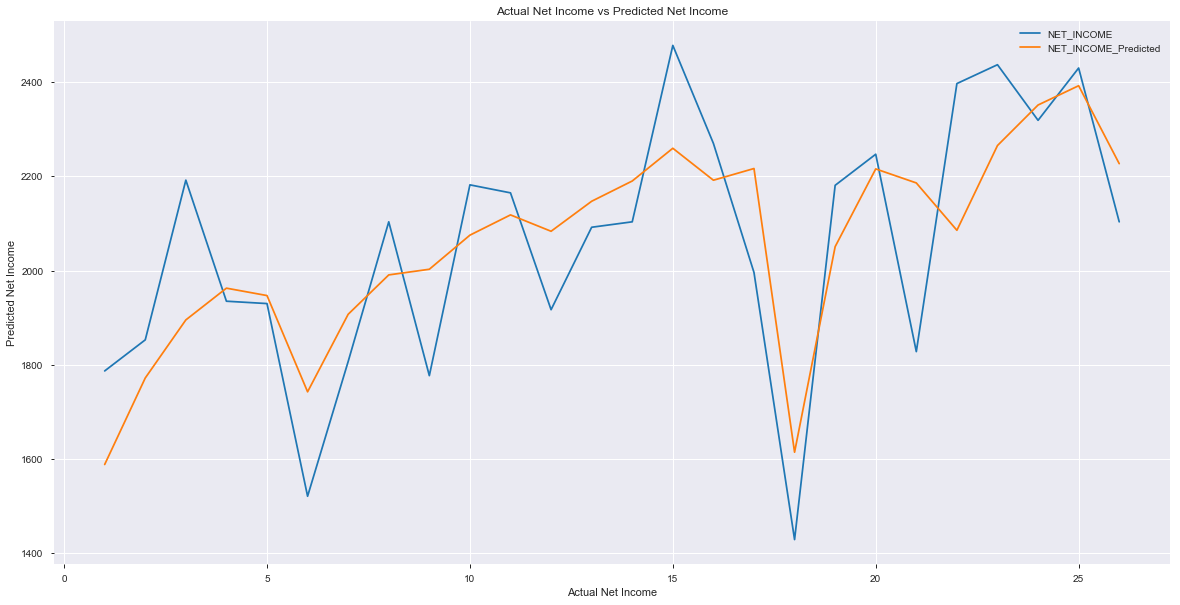

In [28]:
plt.plot(df_Gross_Margin['NET_INCOME'])
plt.plot(df_Gross_Margin['NET_INCOME_Predicted'])
plt.title("Actual Net Income vs Predicted Net Income")
plt.xlabel('Actual Net Income')
plt.ylabel('Predicted Net Income')
plt.legend()

### Approach 4

### Multiple Linear Regression

#### Using Multiple Linear Regression on the linearly correlated variables

In [29]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D

In [30]:
mlr_data = df_item_totals[df_item_totals.columns.difference(['GROSS_MARGIN','INCOME_BeforeTax','Total_COSTSales', 'Qtr'])]

In [31]:
mlr_data.head()

,NET_INCOME,NetInterest_OtherIncome,OPIN,PROVISION_for_Income_Taxes,Total_NETSales,Total_OPEX
1,1787,115,2124,452,9021,3764
2,1853,-15,2370,502,9815,3962
3,2192,58,2345,211,10368,4285
4,1935,93,2325,483,10836,4468
5,1930,74,2351,495,10750,4404


### Normalize the data:

In [32]:
#we need to normalize the features using mean normalization
x = mlr_data.mean()
y = mlr_data.std()
mlr_data_norm = (mlr_data - x)/y
mlr_data_norm.head()

,NET_INCOME,NetInterest_OtherIncome,OPIN,PROVISION_for_Income_Taxes,Total_NETSales,Total_OPEX
1,-0.720577,1.077869,-0.824871,0.082858,-2.721014,-2.359495
2,-0.570333,-1.210571,-0.261390,0.317534,-1.847303,-1.754912
3,0.201376,0.074476,-0.318654,-1.048276,-1.238787,-0.768647
4,-0.383666,0.690594,-0.364465,0.228357,-0.723804,-0.209866
5,-0.395048,0.356130,-0.304911,0.284679,-0.818437,-0.405287


In [33]:
#setting the matrixes
X =  mlr_data_norm.iloc[:,1:6]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

y =  mlr_data_norm.iloc[:,0:1].values #.values converts it from pandas.core.frame.DataFrame to numpy.ndarray
theta = np.zeros([1,6])

#set hyper parameters
alpha = 0.01
iters = 1000

### Create the cost and Gradient Descent function

In [34]:
#computecost
def computeCost(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))

#gradient descent
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = computeCost(X, y, theta)
    
    return theta,cost

In [35]:
#running the gd and cost function
g,cost = gradientDescent(X,y,theta,iters,alpha)
print(g)

finalCost = computeCost(X,y,g)
print(finalCost)

[[ 2.78076173e-16  1.05661288e-01  8.44928617e-01 -4.71797481e-01
   1.88012887e-01 -1.46760983e-01]]
0.002701924244649034


### Plot the cost

Text(0.5,0,'Iterations')

Text(0,0.5,'Cost')

Text(0.5,1,'Error vs. Training Epoch')

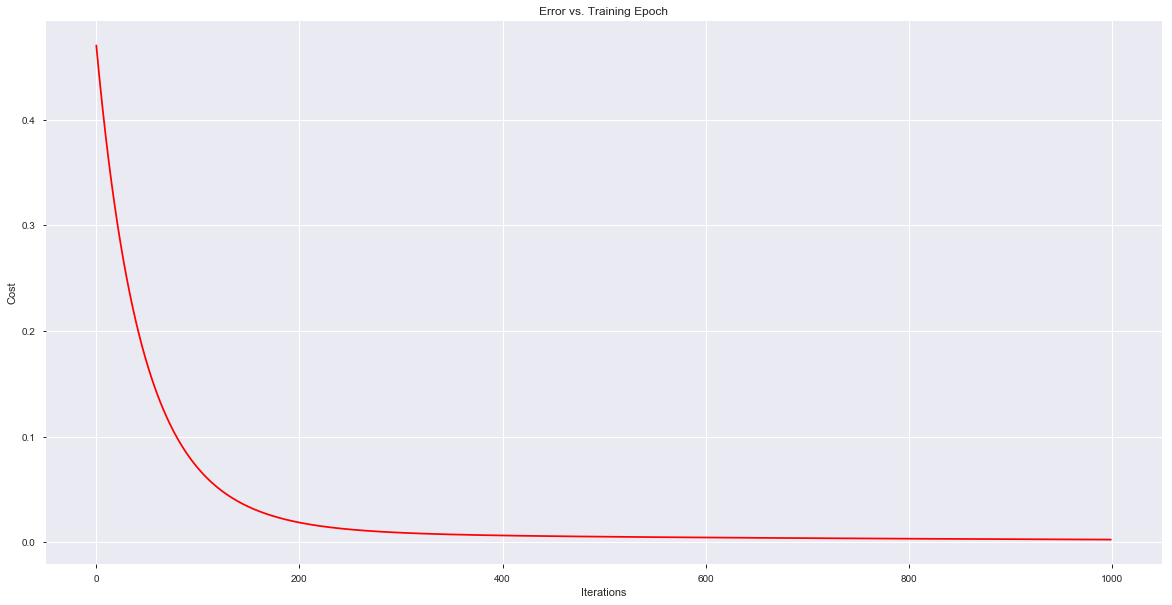

In [36]:
#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  

## Using Scikit Learn

### Model Building

#### Linear Regression 

##### Predicting Net Income using the individual Cash flow items

In [37]:
#implement linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [38]:
df_items.head()

,Qtr,NETSales_Product,NETSales_Service,COSTSales_Product,COSTSales_Service,OPEX_R_D,OPEX_Sales_Marketing,OPEX_General_Administrative,OPEX_Intag_Assets,OPEX_Restruct_OtherCharges,Interest_Income,Interest_Expense,Other_Income,PROVISION_for_Income_Taxes,NET_INCOME
1,1,7200,1821,2486,647,1224,2010,425,105,73.0,168,-114,61,452,1787
2,2,7976,1839,2815,668,1247,2126,451,138,73.0,155,-158,-12,502,1853
3,3,8436,1932,3010,728,1411,2278,479,117,73.0,158,-182,82,211,2192
4,4,8808,2028,3309,734,1391,2368,578,131,73.0,154,-169,108,483,1935
5,5,8700,2050,3249,746,1431,2402,458,113,73.0,160,-166,80,495,1930


In [39]:
X =  df_items.iloc[:,1:14]
Y =  df_items.iloc[:,14:]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,  random_state=None, shuffle=False)

In [41]:
slr = LinearRegression()
slr.fit(X_train,y_train)

#make predictions and find the rmse

y_pred = slr.predict(X_test)

# Model Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE Value :", rmse)
print("R-Squared Value :", r2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

RMSE Value : 254.21709389703355
R-Squared Value : 0.4612662622228557


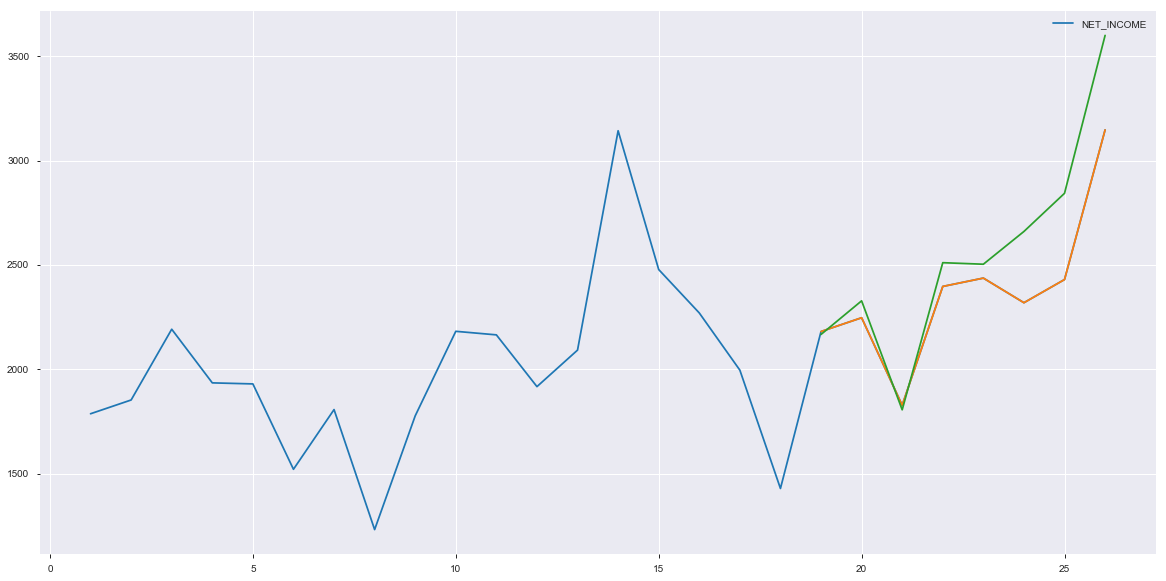

In [42]:
#plot
y_test['Predictions'] = 0
y_test['Predictions'] = y_pred

plt.plot(df_items['NET_INCOME'])
plt.plot(y_test[['NET_INCOME', 'Predictions']])
plt.legend()

#### Predicting Net Income using Key Sub Total Variables

In [43]:
df_Key = df_item_totals[df_item_totals.columns.difference(['Qtr','Total_OPEX','OPIN', 'GROSS_MARGIN',
                                                           'PROVISION_for_Income_Taxes','NetInterest_OtherIncome'])]
#df_Key = df.loc[:,('Total_COSTSales', 'INCOME_BeforeTax', 'NET_INCOME')]

df_Key.head()
df_Key.shape

,INCOME_BeforeTax,NET_INCOME,Total_COSTSales,Total_NETSales
1,2239,1787,3133,9021
2,2355,1853,3483,9815
3,2403,2192,3738,10368
4,2418,1935,4043,10836
5,2425,1930,3995,10750


(26, 4)

In [44]:
#split into train and validation
train = df_Key[:20]
test = df_Key[20:]


# Split into train and validation
x_train = train.drop('NET_INCOME', axis=1)
y_train = train['NET_INCOME']
x_test = test.drop('NET_INCOME', axis=1)
y_test = test['NET_INCOME']

In [45]:
#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

# Model Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE Value :", rmse)
print("R-Squared Value :", r2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

RMSE Value : 208.19995214242007
R-Squared Value : 0.7077292967080978


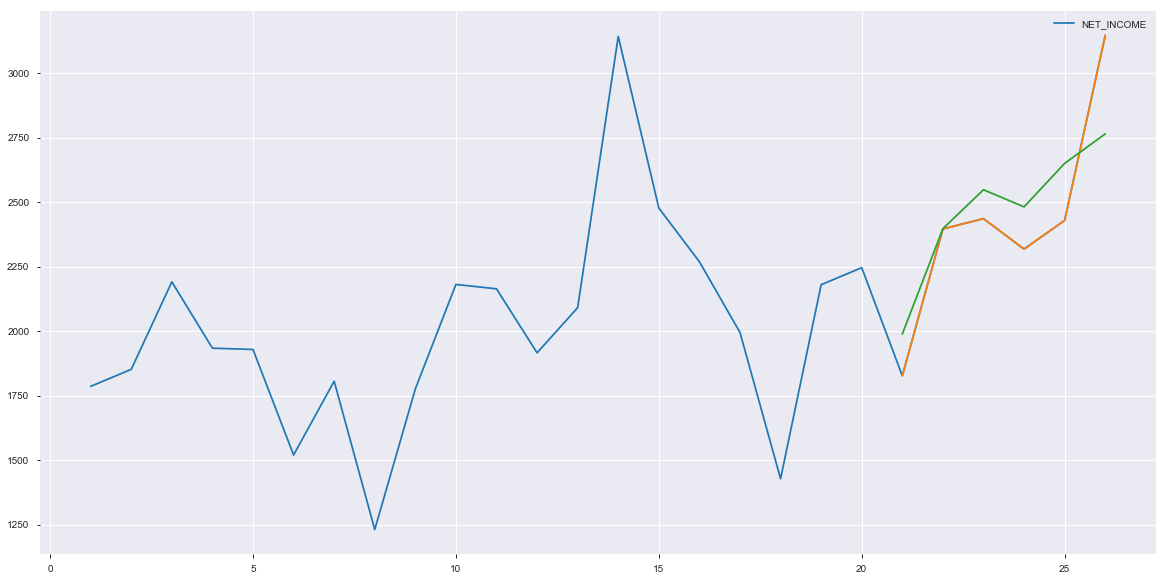

In [46]:
#plot
test['Predictions'] = 0
test['Predictions'] = y_pred

plt.plot(df_items['NET_INCOME'])
plt.plot(test[['NET_INCOME', 'Predictions']])
plt.legend()